In [1]:
import pandas as pd
from sklearn import cluster, datasets
import numpy as np
import scipy
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
cluster_data=pd.read_csv("CleanedLoandata.csv",encoding = "ISO-8859-1")
select_columns=cluster_data[['loan_amnt','funded_amnt_inv','installment','term', 'emp_length', 'home_ownership',
                                 'purpose', 'addr_state', 'dti','verification_status','delinq_2yrs','revol_util',
                                'inq_last_6mths', 'open_acc','pub_rec','revol_bal','total_acc','mths_since_last_major_derog',
                                'Risk_Score','application_type','int_rate']]
select_columns.to_csv("featurecluster.csv",index=False)

C:\Users\jaini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (14,41,51,110,121,122,123,126,127,128,131,137,138,139,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
feature_cluster=pd.read_csv("featurecluster.csv",encoding = "ISO-8859-1")

In [4]:
feature_cluster.drop('application_type',axis=1,inplace=True)
feature_cluster.drop('purpose',axis=1,inplace=True)

In [5]:
feature_cluster.drop('annual_inc',axis=1,inplace=True)

ValueError: labels ['annual_inc'] not contained in axis

In [93]:
feature_cluster.drop('home_ownership',axis=1,inplace=True)

In [98]:

feature_cluster.drop('mths_since_last_major_derog',axis=1,inplace=True)

In [122]:
feature_cluster.drop('revol_bal',axis=1,inplace=True)

In [124]:
k_means=cluster.KMeans(n_clusters=4)
k_means.fit(feature_cluster)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [125]:
print(k_means.labels_)

[3 3 3 ..., 1 1 2]


In [126]:
df1=pd.DataFrame(feature_cluster,columns=['loan_amnt','installment','term', 'emp_length',
                                   'addr_state', 'dti',
                                'inq_last_6mths', 'open_acc','pub_rec', 'total_acc',
                                
                                'Risk_Score'])
df2=pd.DataFrame(k_means.labels_,columns=['label'])
df=pd.concat([df1, df2], axis=1)

In [127]:
df['label'].value_counts()

0    582454
3    501713
2    371879
1    190727
Name: label, dtype: int64

In [128]:
tsnedata=df.sample(n=6000)

In [133]:
tsnedata.drop('revol_bal',axis=1,inplace=True)

C:\Users\jaini\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\jaini\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\jaini\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 12.660852
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.242289
[t-SNE] Error after 300 iterations: 1.242289


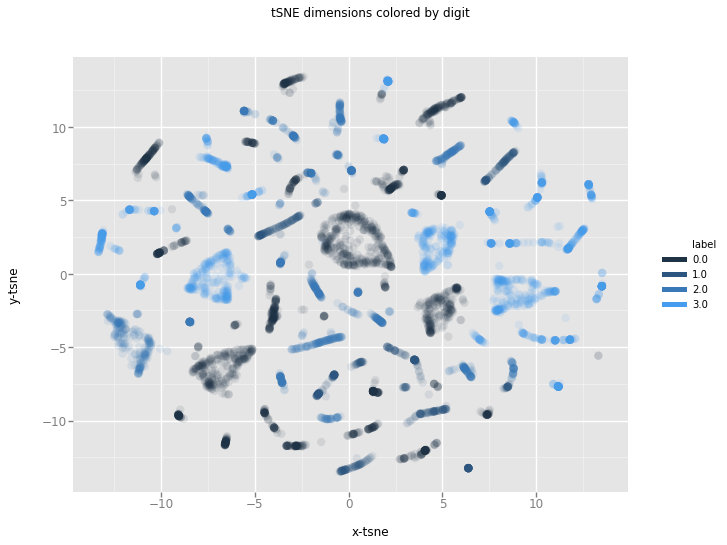

<ggplot: (-9223371905773328082)>

In [135]:
from sklearn.manifold import TSNE
from ggplot import *
n_sne = 7000

#time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(tsnedata.values)
#print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)
df_tsne = tsnedata.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [124]:
cluster_1=df[df.label == 1]
cluster_1.to_csv("cluster1.csv",index=False)

In [126]:
cluster_2=df[df.label == 2]
cluster_2.to_csv("cluster2.csv",index=False)

In [125]:
cluster_0=df[df.label == 0]
cluster_0.to_csv("cluster0.csv",index=False)

In [127]:
cluster_3=df[df.label == 3]
cluster_3.to_csv("cluster3.csv",index=False)

In [ ]:
K = range(1,15)
KM = [kmeans(feature_cluster,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

In [ ]:
kIdx = 3
### Bend graph
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='*', markersize=10, 
    markeredgewidth=2, markeredgecolor='b', markerfacecolor='None')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('WSS')
plt.title('Bend for KMeans clustering')
plt.show()

In [10]:
cluster_data['grade'].value_counts()

C    490783
B    485359
A    272724
D    237509
E    111960
F     37411
G     11026
0         1
Name: grade, dtype: int64